<a href="https://colab.research.google.com/github/jimwellh/NYCU-Introduction-to-Data-science/blob/main/0811033_%E9%BB%83%E5%8B%81%E7%91%8B_hw09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Science** Homework 9
0811033_黃勁瑋_hw09\
2023/12/10


Use R, Python, and suitable computer packages to perform different types of
Clustering Models.
*   Conduct the Hierarchical clustering and discuss results
*   Conduct the K-means and discuss results.
*   Conduct the Silhouette plot and choose K in K-means.

In this homework I decide to analyze the Wine Dataset for Clustering dataset from Kaggle (kaggle datasets download -d harrywang/wine-dataset-for-clustering). The dataset include 13 variables.


1.   Alcohol
2.   Malic acid
2.   Ash
2.   Alcalinity of ash
2.   Magnesium
2.   Total phenols
2.   Flavanoids
2.   Nonflavanoid phenols
2.   Proanthocyanins
2.   Color intensity
2.   Hue
2.   OD280/OD315 of diluted wines
2.   Proline

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from 3 different cultivars. Therefore, the final cluster result is expected to converge into 3 groups as a reflection to reality.  


**Load the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df= pd.read_csv('/content/drive/MyDrive/Introduction to Data science/Data sets/wine-clustering.csv')
#check is the data is read successfully
print(df.head(10))
print(df.shape)


Mounted at /content/drive
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   
5    14.20        1.76  2.45          15.2        112           3.27   
6    14.39        1.87  2.45          14.6         96           2.50   
7    14.06        2.15  2.61          17.6        121           2.60   
8    14.83        1.64  2.17          14.0         97           2.80   
9    13.86        1.35  2.27          16.0         98           2.98   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76          

**Data Visualization**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None


There are 178 data and have no missing value.

In [ ]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


As we can see, varaible Magnesium and Proline have relativly larger number compare to other variables. We should consider to normolize the data before analyzing.  

<Axes: >

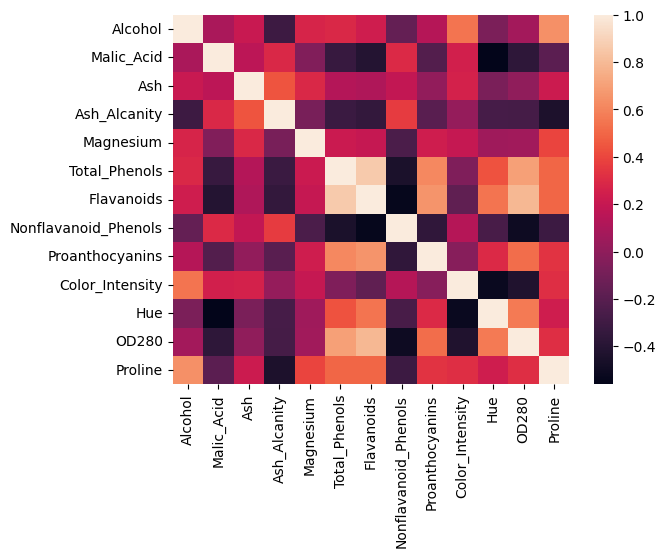

In [ ]:
sns.heatmap(df.corr(), annot=False)

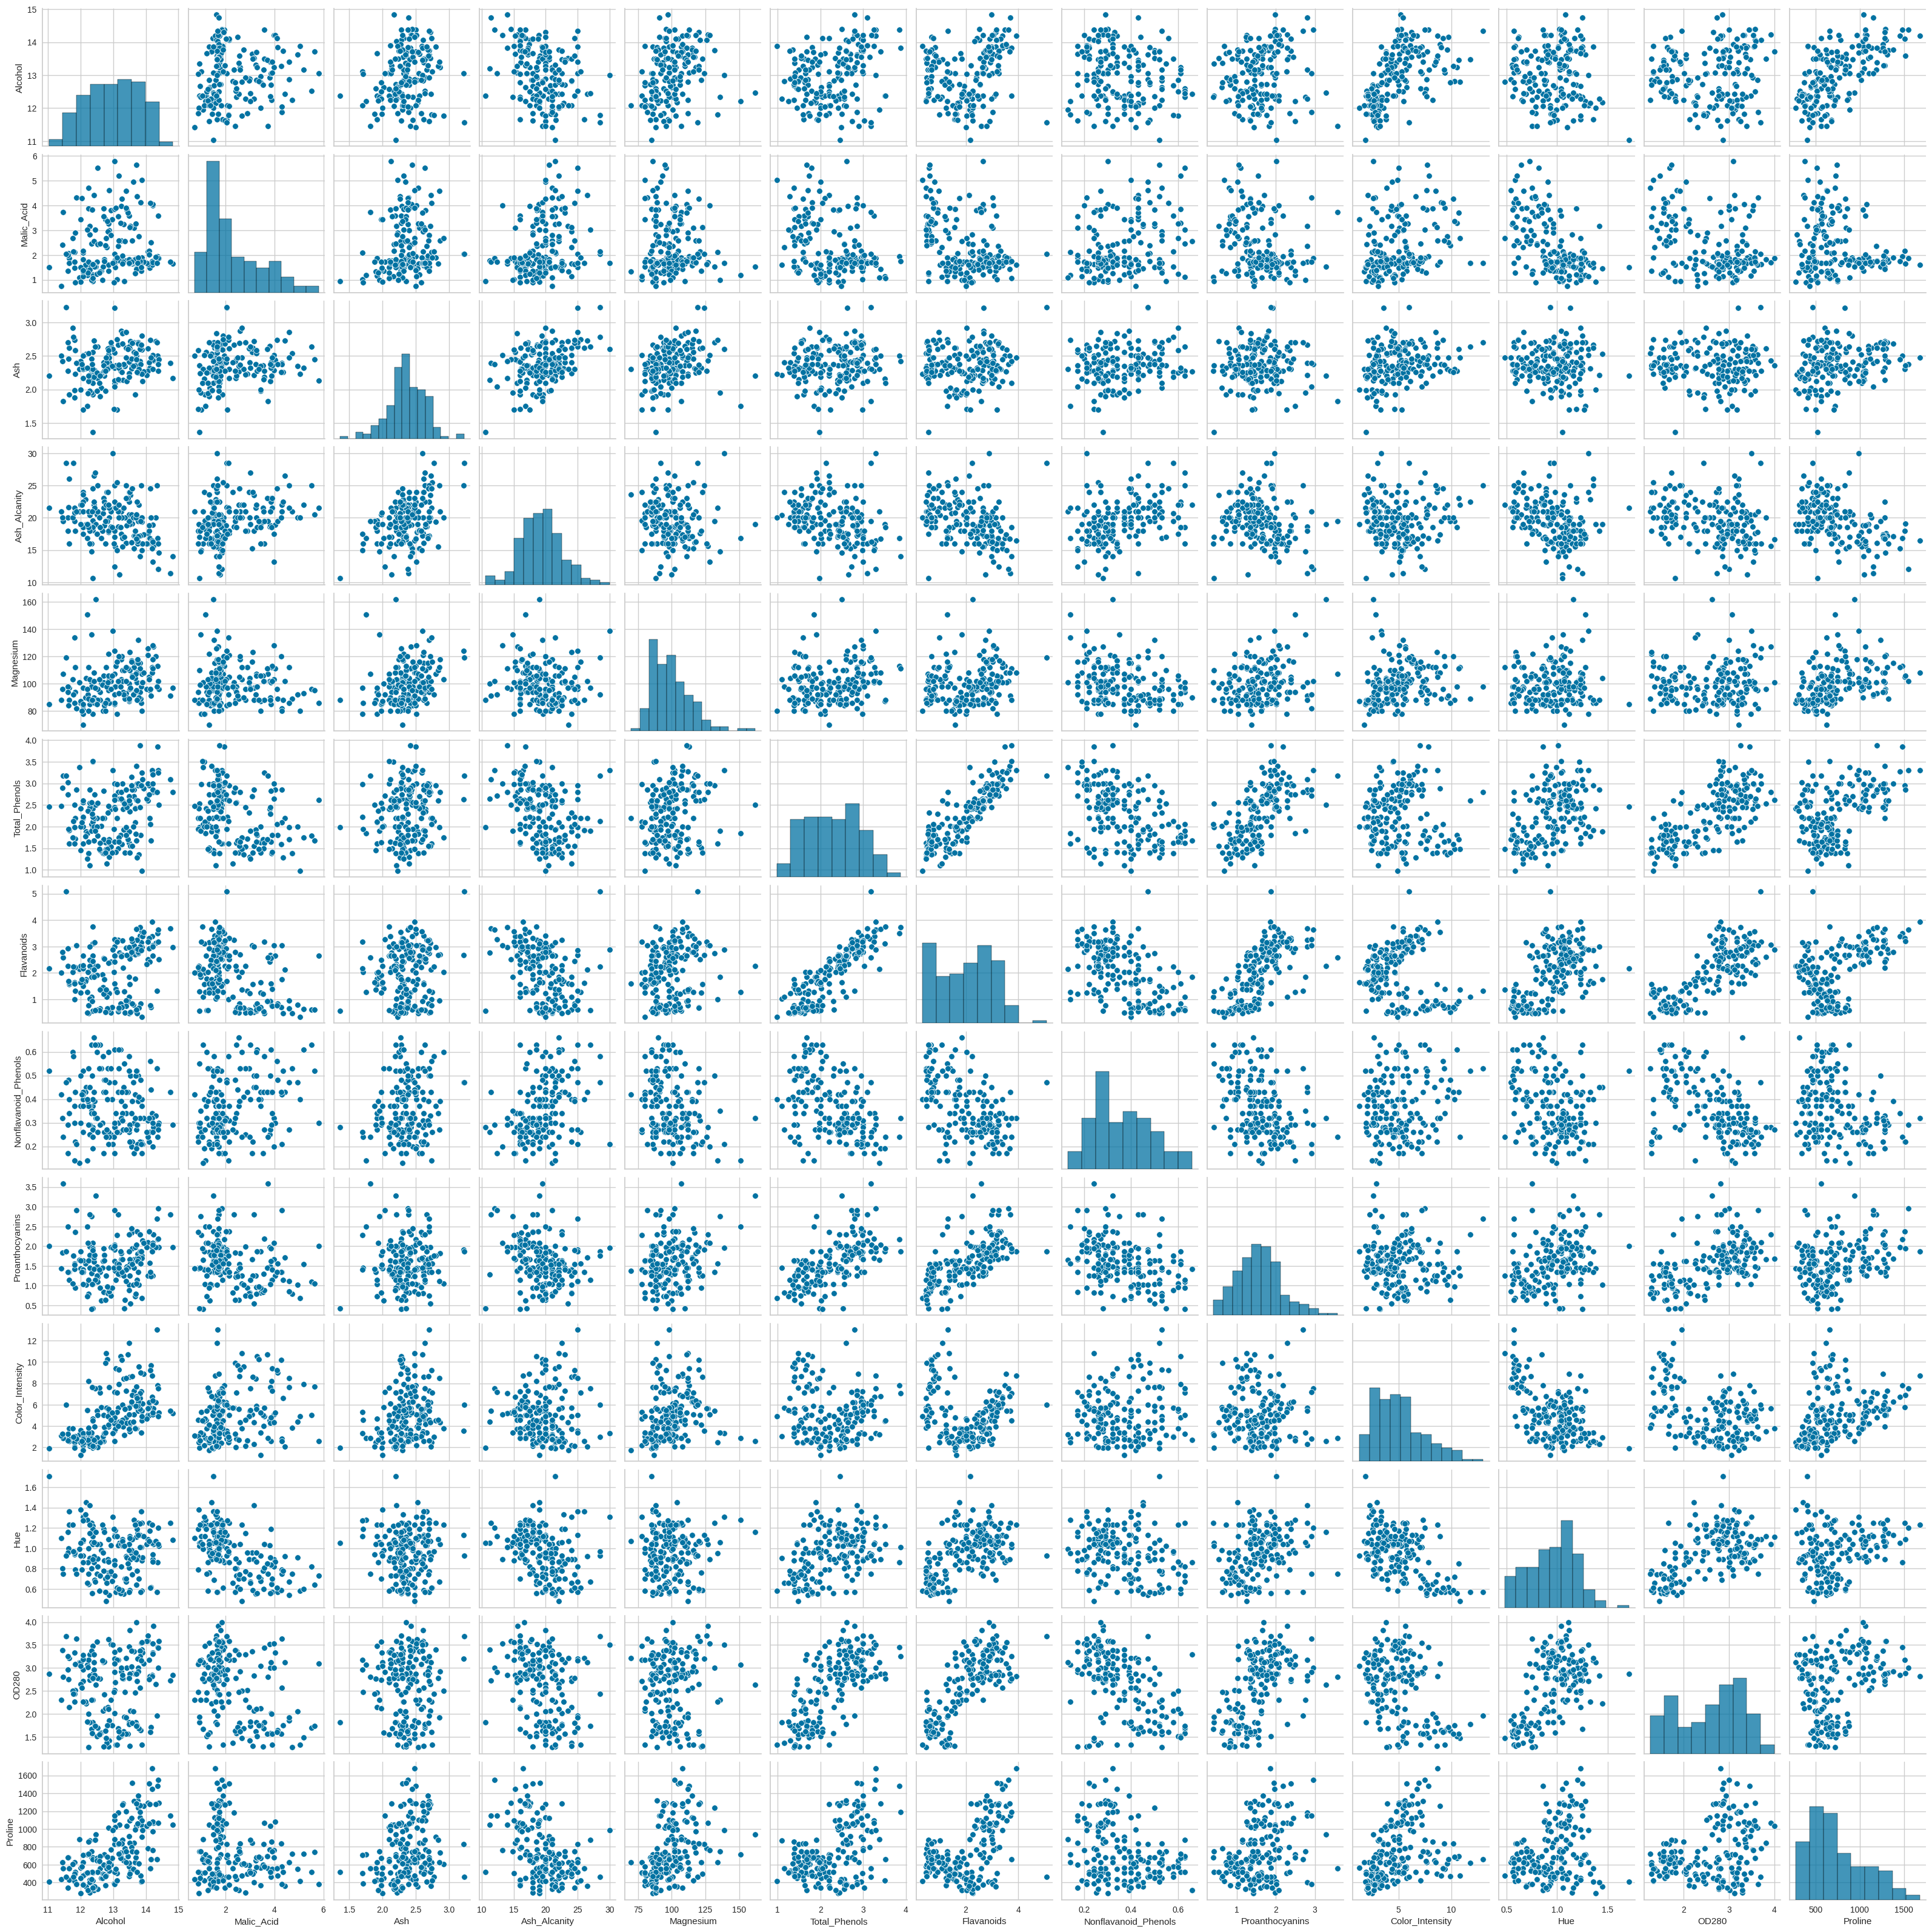

In [ ]:
sns.pairplot(df)
plt.show()

A pair plot can show the relationships between two variables, however, it is hard to group the data by human simpily using pair plot for this dataset. Therefore, we would try to reduce the dimension of the dataset by PCA and see the result.

**PCA**

Before PCA, we first normolize the data

In [ ]:
# Scale to mean=0 and standard deviation=1
SS=StandardScaler()

# Apply scaling
df_norm=pd.DataFrame(SS.fit_transform(df), columns=df.columns)

Since we want to show our PCA result on a 2 dimensional plot and see what can we obtain using the plot, we reduce the data into 2 dimension.

In [ ]:
#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_norm)

#
print("Explained variance ratio is: ",pca.explained_variance_ratio_)

# Convert to data frame
df_principal = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

# Shape and preview
print(df_principal.shape)
df_principal.head()

Explained variance ratio is:  [0.36198848 0.1920749 ]
(178, 2)


,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


Generally speaking, the explained variance ratio shows that by reducing the data into 2 dimention, the first principle component can only represent 36% of the original data, and the second principle component can represent another 19%, which is 55% by summing them up. We could also check how each principle component represents the data using the following code.

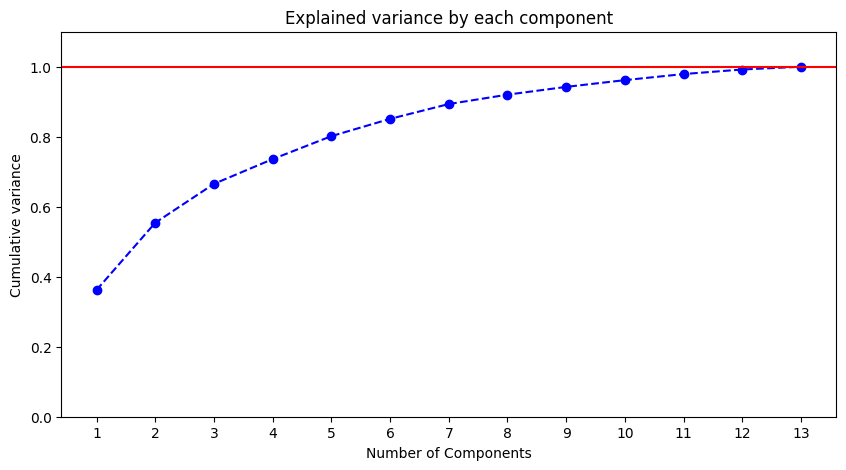

In [ ]:
# PCA
pca_var = PCA()
pca_var.fit(df_norm)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+df_norm.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+df_norm.shape[1], step=1))
plt.ylabel('Cumulative variance')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

Ideally, by adding the explained variance ratio of each component until it is larger or equal to 0.8 (80%) is the sweat spot of the number of components to include for analysis. Thus, this data is beter reduced to minimum 5 principal components. Reducing the data into any dimension which is lower then 5 could cause too much information loss. However, since we want to plot the result for better visualization, we will keep the 2 components PCA outcome.     

After applying PCA, the result is plotted

Text(0, 0.5, 'PC2')

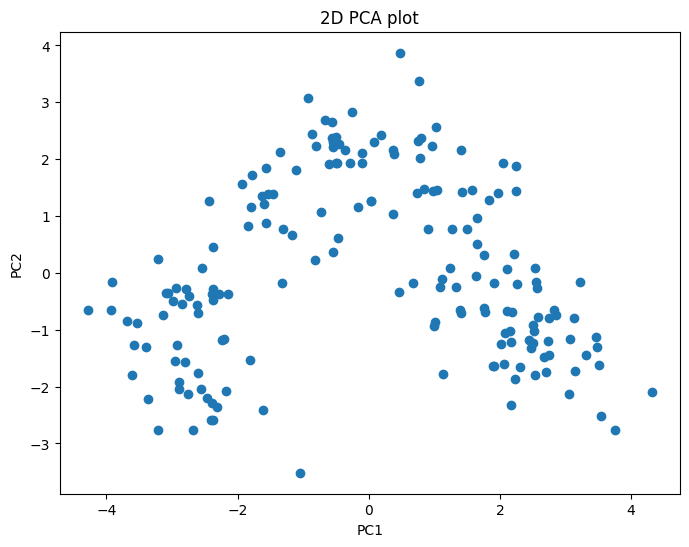

In [ ]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(df_principal.iloc[:,0], df_principal.iloc[:,1])

# Aesthetics
plt.title('2D PCA plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

The data forms a inverse "U" shape on the PCA result plot, but it is still hard to tell how many groups are best to describe the data by simpily using the PCA plot. Hence, we will have to use the elbow or silhouette method to check the optimal number of clusters for this dataset.

**Elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

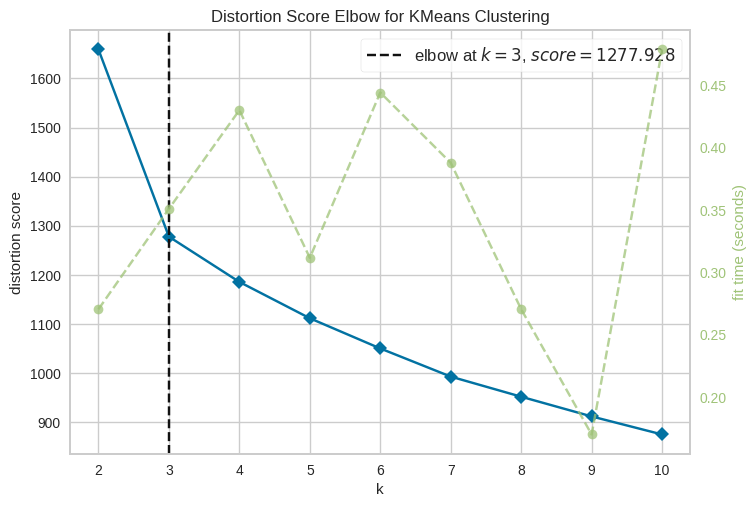

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model)
visualizer.fit(df_norm)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

Using the elbow method, K should be 3 in K-means model for this dataset according to the yellowbrick.cluster's KElbowVisualizer suggestion. From the elbow plot we could also discover that the distortion score drops heavily when k moves from 2 to 3 and maintains a linear decend after. According to that, k=3 is a good representation of the dataset.   

**Silhouette plot**

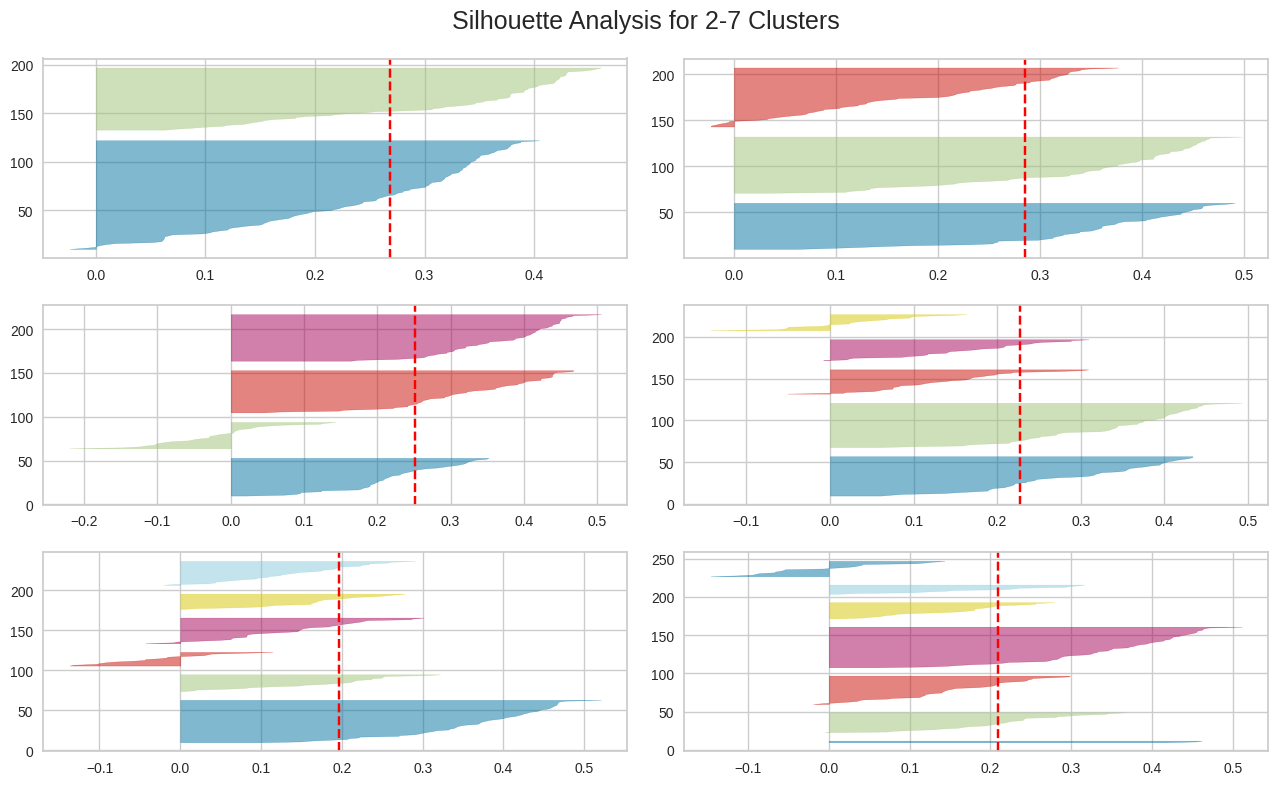

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 2, figsize=(13,8))
fig.suptitle('Silhouette Analysis for 2-7 Clusters', size = 18)
plt.tight_layout()

for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_norm)

Silhouette plot for 3 clusters has the highest Silhouette coefficient amoung all other results. Moreover, the amount of datapoints are also more average on the Silhouette plot for 3 clusters compare to the others.   

From using both the elbow method and the Silhouette plot to analyze the K-means clustering, we conclude that K=3 is the optimal number of clusters for this dataset using K-means clustering model. The result supports the reality which the data is about wines from 3 different cultivars. Therefore the number of clusters will be set to 3 in the next modeling section.

**Modeling**

*Hierarchical clustering*

The sklearn package accepts single, average, complete, and Ward linkage type for Hierarchical clustering method. In the Hierarchical clustering section , we will try different linkage and compare the result

In [ ]:
from sklearn.cluster import AgglomerativeClustering

1.   Single linkage




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


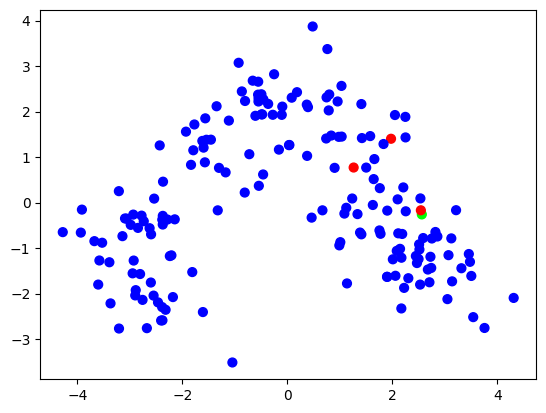

In [ ]:
AgglomerativeC = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
y_AgglomerativeC = AgglomerativeC.fit_predict(df_norm)
plt.scatter(df_principal.iloc[:,0], df_principal.iloc[:,1], c=y_AgglomerativeC, cmap="brg", s=40)

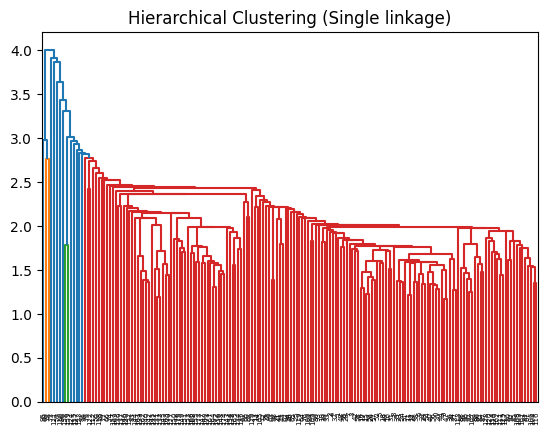

In [ ]:
import scipy.cluster.hierarchy as sch
dis=sch.linkage(df_norm,metric='euclidean',method='single')
sch.dendrogram(dis)
plt.title('Hierarchical Clustering (Single linkage)')
plt.show()

As we can see, the single linkage results a highly imbalance clustering result. Most of the data are clustered in the same group, which indicates an unacceptable result.

2.   Average linkage




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


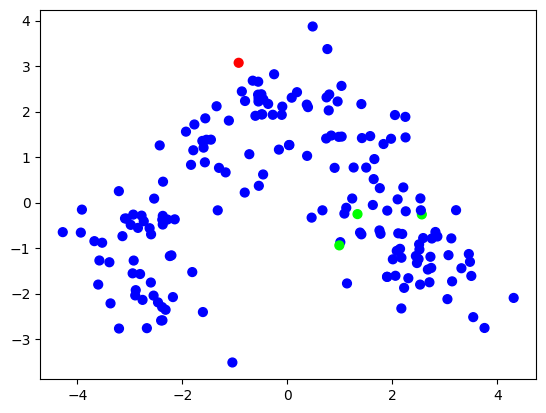

In [ ]:
AgglomerativeC = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
y_AgglomerativeC = AgglomerativeC.fit_predict(df_norm)
plt.scatter(df_principal.iloc[:,0], df_principal.iloc[:,1], c=y_AgglomerativeC, cmap="brg", s=40)

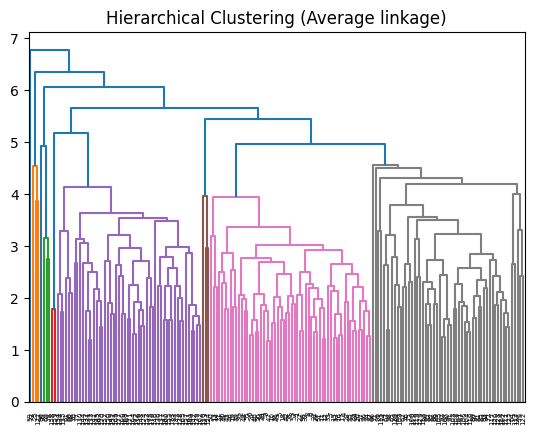

In [ ]:
import scipy.cluster.hierarchy as sch
dis=sch.linkage(df_norm,metric='euclidean',method='average')
sch.dendrogram(dis)
plt.title('Hierarchical Clustering (Average linkage)')
plt.show()

Similiar to simple linkage, the average linkage also groups most of the data in the same group. The result is not good.

3.   Complete linkage




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


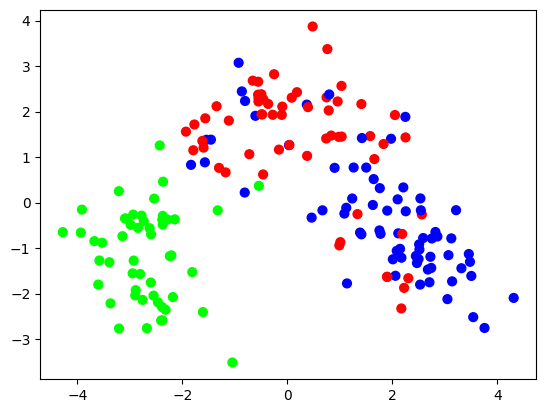

In [ ]:
AgglomerativeC = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
y_AgglomerativeC = AgglomerativeC.fit_predict(df_norm)
plt.scatter(df_principal.iloc[:,0], df_principal.iloc[:,1], c=y_AgglomerativeC, cmap="brg", s=40)

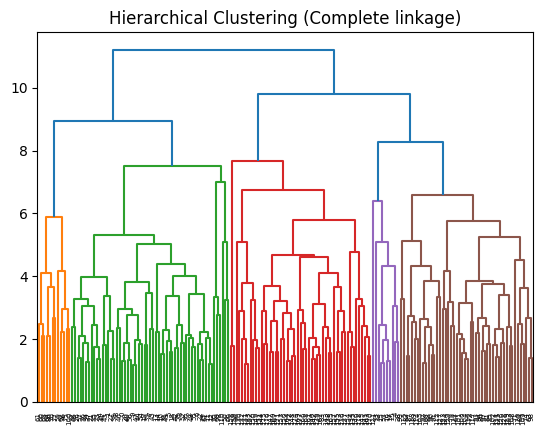

In [ ]:
import scipy.cluster.hierarchy as sch
dis=sch.linkage(df_norm,metric='euclidean',method='complete')
sch.dendrogram(dis)
plt.title('Hierarchical Clustering (Complete linkage)')
plt.show()

From the scatter plot we can see that unlike single and average likage, complete linkage groups the data evenly. However, the green part of data looks more seperate and the blue and red part seams to be mixed together on the 2D PCA plot. Moreover, the scipy.cluster.hierarchy package suggested 5 cluster group instead of 3, which did not match or expatation. In conclusion, using average likage on this dataset is acceptable but not ideal.    

4.   Ward linkage




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


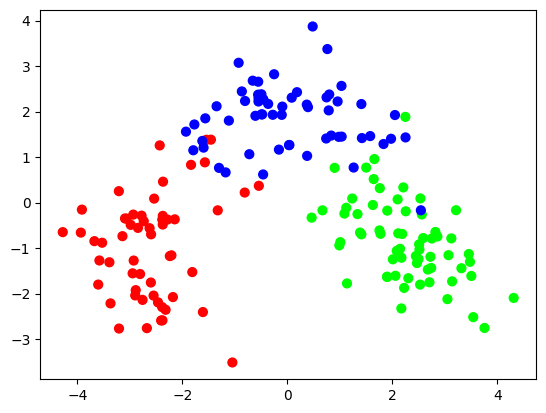

In [ ]:
AgglomerativeC = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_AgglomerativeC = AgglomerativeC.fit_predict(df_norm)
plt.scatter(df_principal.iloc[:,0], df_principal.iloc[:,1], c=y_AgglomerativeC, cmap="brg", s=40)

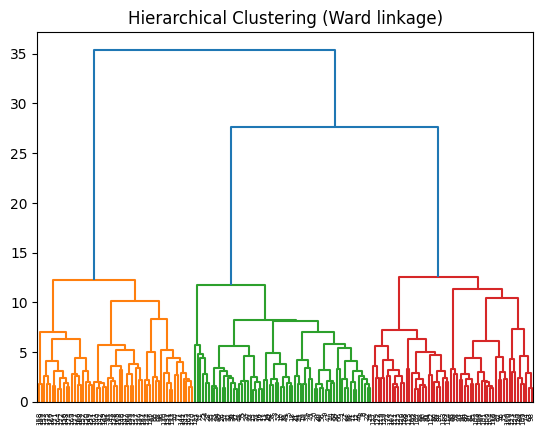

In [ ]:
import scipy.cluster.hierarchy as sch
dis=sch.linkage(df_norm,metric='euclidean',method='ward')
sch.dendrogram(dis)
plt.title('Hierarchical Clustering (Ward linkage)')
plt.show()

The scipy.cluster.hierarchy package suggested 3 cluster group which is the same as we expectted. The scatter plot also shows that using Ward linkage could obtain a better seperate of the data compare to the result of complete linkage. Using Ward linkage for Hierarchical clustering seams to be the best option amoung all Hierarchical clustering linkage types we tried for this dataset.

*K-means*

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'PC2')

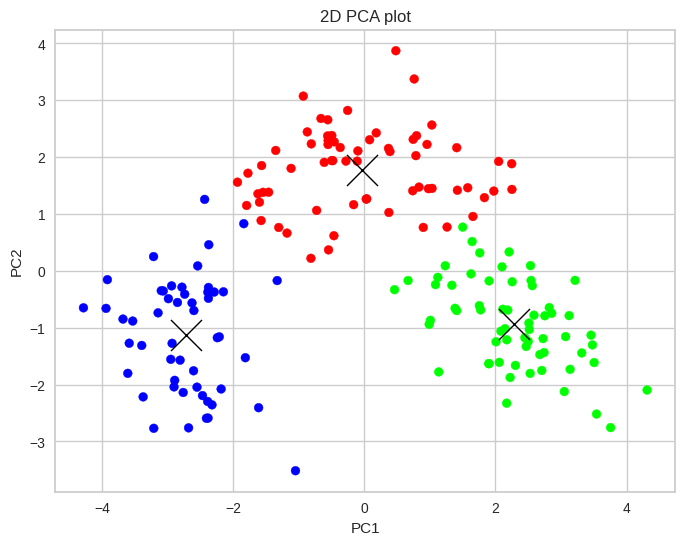

In [ ]:
# KMeans
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

# Train and make predictions
clusters = kmeans.fit_predict(df_norm)

# Cluster centers
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

#Plot
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(df_principal.iloc[:,0], df_principal.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=1, color="black")

# Aesthetics
plt.title('2D PCA plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

The K-means method seperate the data clean and evenly. It is easy to tell the difference between each group on the PCA plot. Therefore, using K-means method with K=3 is a fantastic way to cluster this dataset.   

**Conclusion**

From the result we find that


*   The data is better to reduced into minimum 5 principal components to maintain the infomation while reducing the number of variables if we want to perform PCA befor modeling. However, since we are only using PCA to plot the data, we will accept the result of 2 dimentional PCA.

*   Both elbow method and Silhouette plot suggestted K=3 is the optimal number of clusters for this dataset using K-means clustering model, which fulfills our expatation.

*   If we want to analyze the data using Hierarchical clustering, applying Ward linkage can obtain the best result.

*   Compare the PCA plot between the result from K-means method and Hierarchical clustering with Ward linkage we can see that K-means groups the data more clear and clean. Therefore for clustering this data set, an optimal way is using the K-means model with K=3.

*   The previous statement is concluded using data visualization. If we want to compare the result between different clustering models, another better wa is to seperate the data into training and validation set. I did not apply this method on this homework, but it could be done in future study.  

